In [70]:
import pandas as pd;
pd.set_option('display.max_columns', None)
import numpy as np;

import seaborn as sns
import matplotlib.pyplot as plt


In [71]:
dtypes = {
    "hotel": "category",
    "is_canceled": "category",
    "meal": "category",
    "market_segment": "category",
    "distribution_channel": "category",
    "is_repeated_guest": "category",
    "previous_cancellations": "int64",
    "previous_bookings_not_canceled": "float64",
    "reserved_room_type": "category",
    "assigned_room_type": "category",
    "booking_changes": "int64",
    "days_in_waiting_list": "int64",
    "customer_type": "category",
    "adr": "float64",
    "required_car_parking_spaces": "int64",
    "total_of_special_requests": "int64",
    "arrival_season": "category",
    "deposit_type": "category",
    "arrival_weekday": "category",
    "length_of_stay": "int64",
    "expected_departure_season": "category",
    "expected_departure_weekday": "category",
    "same_season_stay": "category",
    "continent": "category",
    "total_amount_of_guests": "int64",
    "babies_prop": "float64",
    "adults_prop": "float64",
    "solo_travel": "category",
    "previous_cancellations_ind": "category",
    "day_use_ind": "category",
    "lead_time_quartiles": "category",
}

data=pd.read_csv("C:/Users/Alex/Desktop/HotelCancellations/CleanedHotel_bookings.csv",dtype=dtypes)


In [72]:
def categorical_plots(data):
    #Visualizing categorical features against the target variable is_canceled.
    #It's observed that many of the features have levels with few samples
    categorical_cols=data.select_dtypes(include=['category'])
    y=categorical_cols['is_canceled']
    for i in categorical_cols:
        if i != "is_canceled":
            grouped_data = data.groupby([i, "is_canceled"]).size().unstack()
            plot = grouped_data.plot(kind="bar")
            plot.legend(['Not Cancelled', 'Canceled'], title="Cancellation Status")
            plt.title(f"Cancellation Status by {i}")
            plt.xlabel(i)
            plt.ylabel("Cancellation Counts")          
            plt.show()


In [73]:
def cat_combinelvls(data):
    #Combining levels of features that are less than 3% of the total 
    categorical_data=data.select_dtypes(include=['category'])
    for i in categorical_data:
        total=len(data)
        category_obs=data[i].value_counts()
        limit=0.03*total

        keepable_categories=category_obs[category_obs>=limit].index

        if len(keepable_categories) < len(category_obs) and len(category_obs)>2:
            data[i] = data[i].cat.set_categories(
                    keepable_categories.append(pd.Index(["Other"]))
            ).where(data[i].isin(keepable_categories), "Other")

    return data  


In [74]:
def boxplots(data):
    #Boxplots of the numeric features
    numeric_data=data.select_dtypes(include=['number'])
    for i in numeric_data:
        sns.boxplot(data[i])
        plt.xlabel(i)
        plt.title(f"Boxplot of {i}")
        plt.show()
        


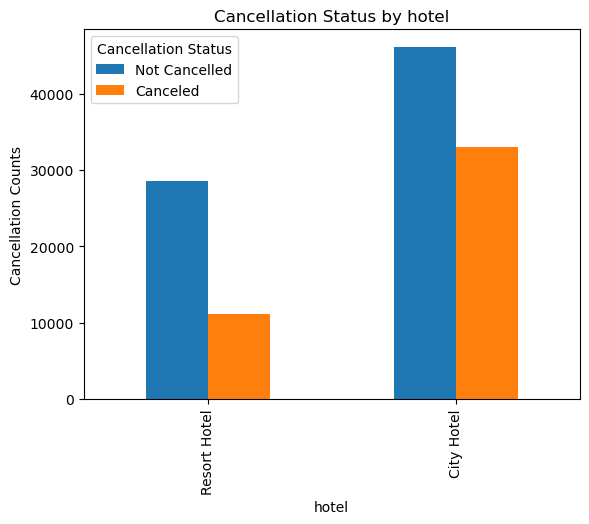

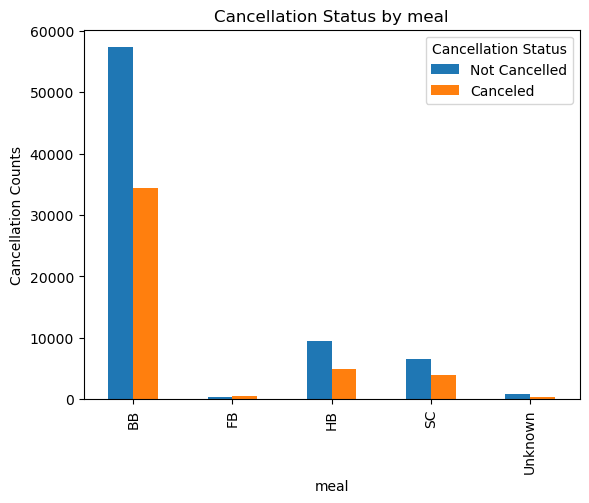

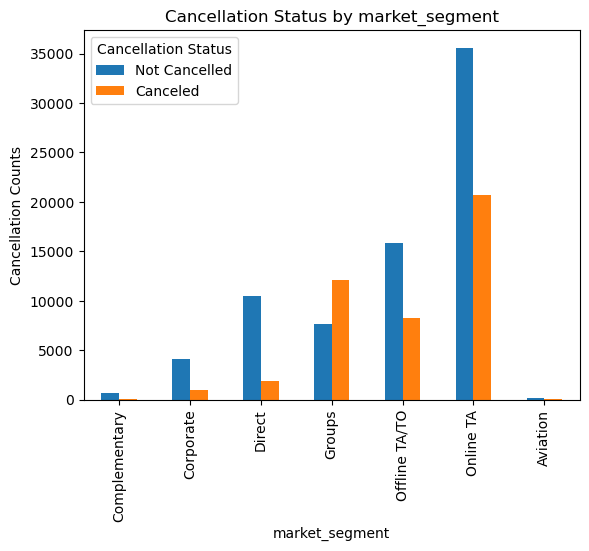

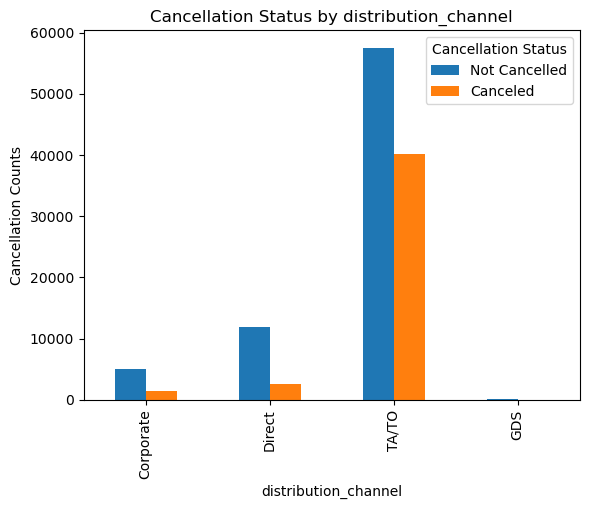

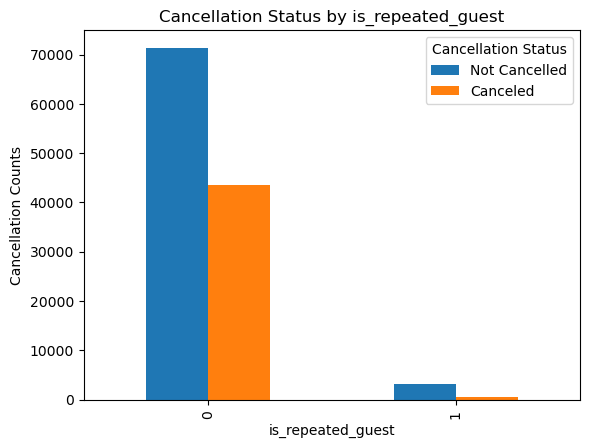

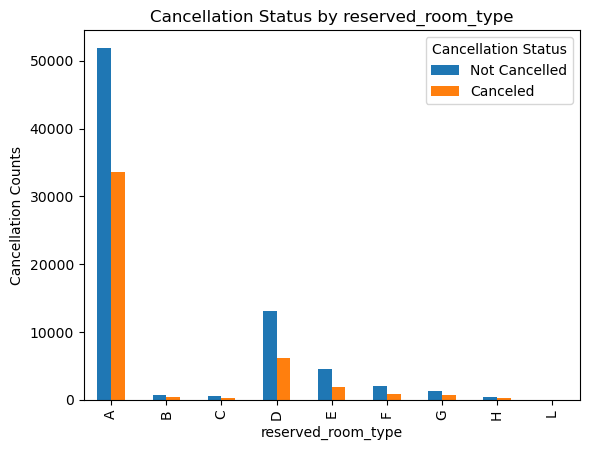

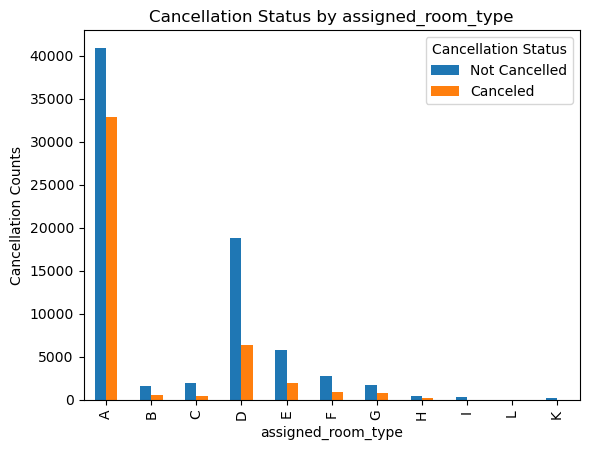

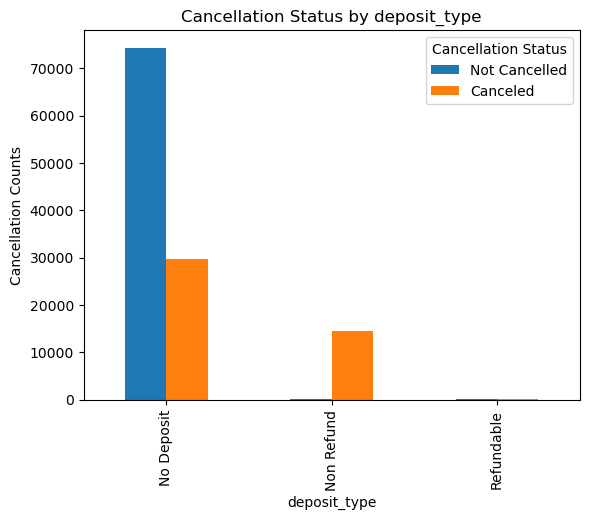

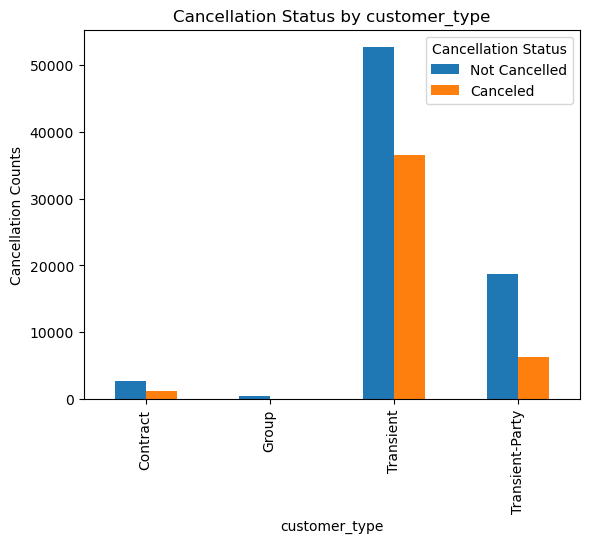

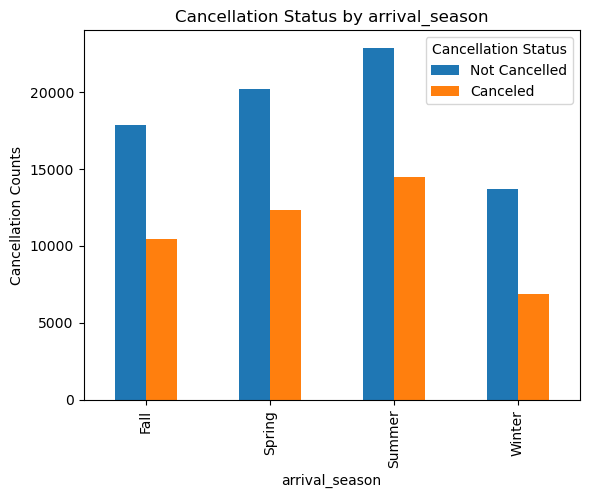

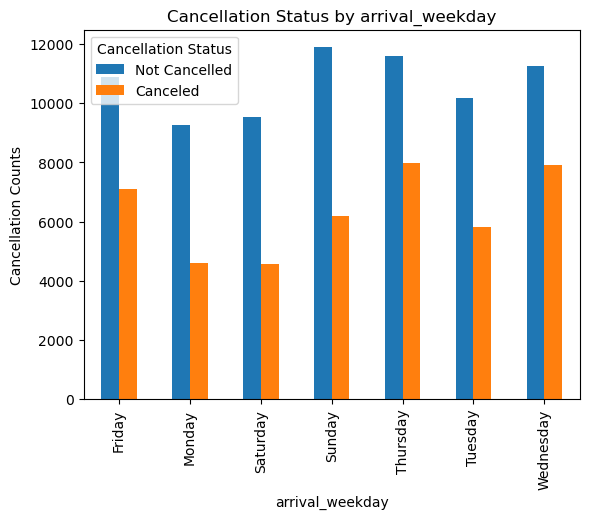

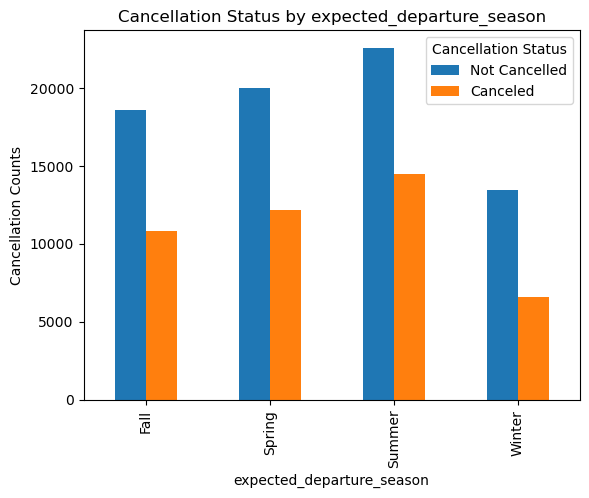

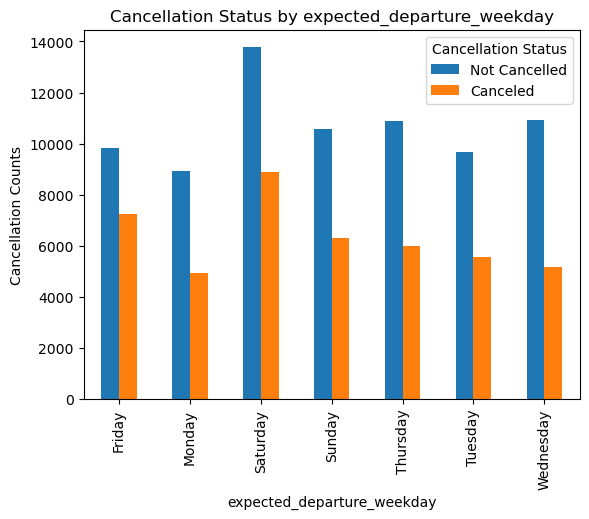

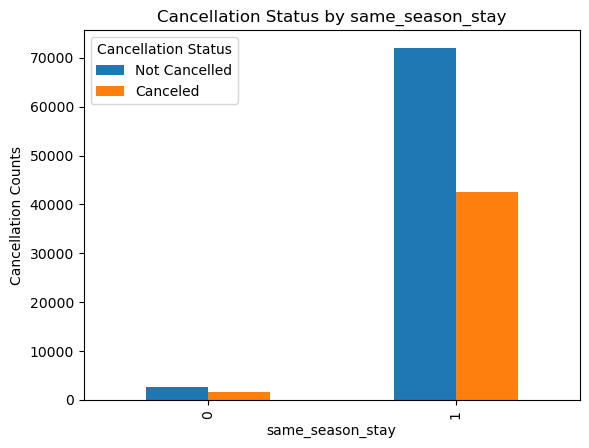

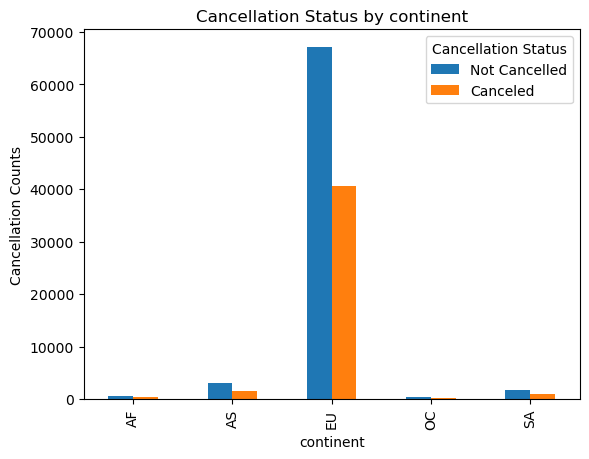

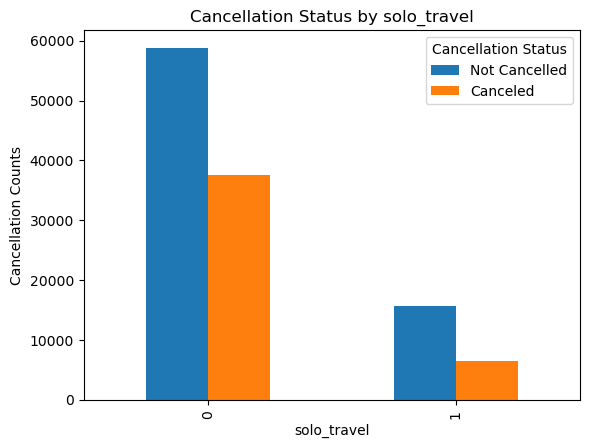

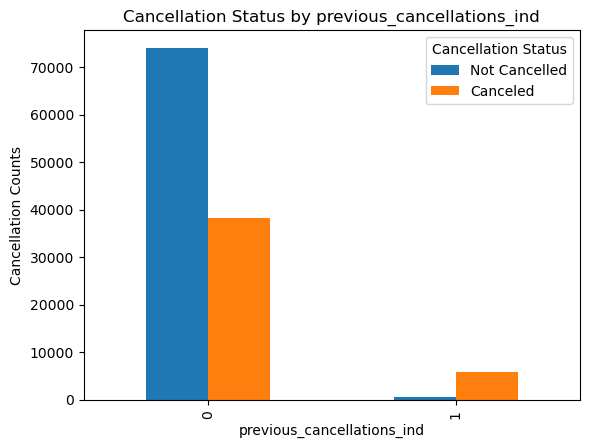

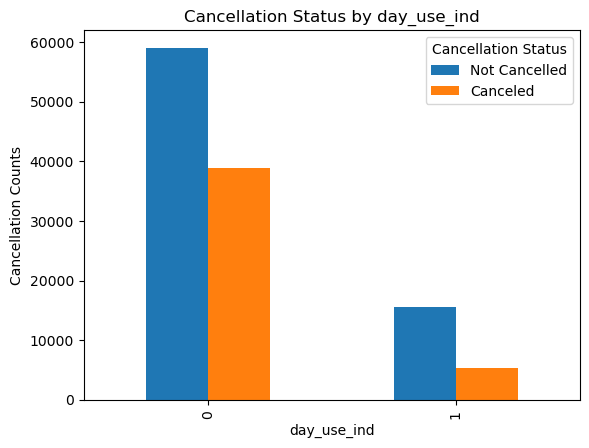

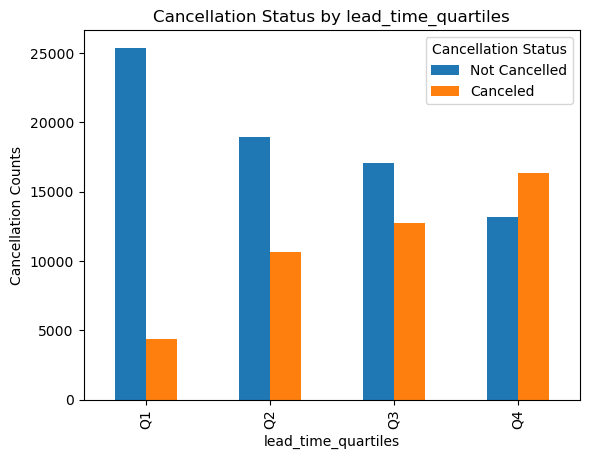

In [75]:
categorical_plots(data)

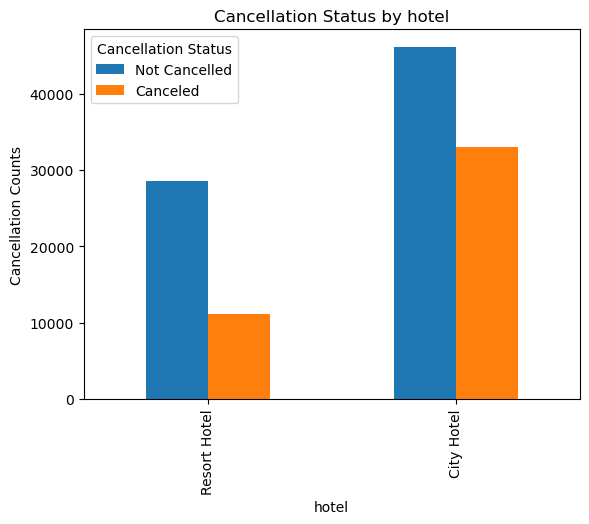

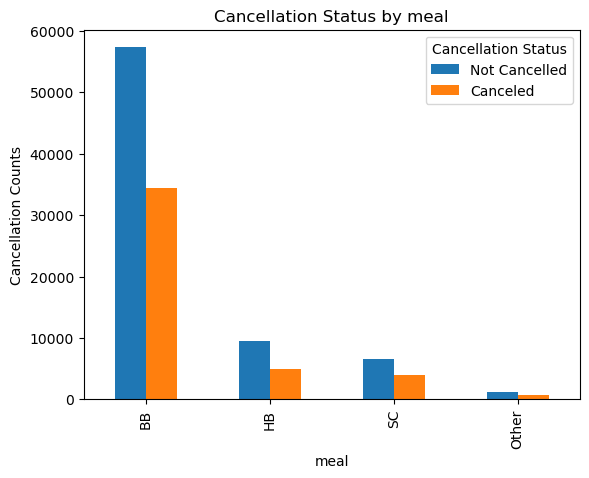

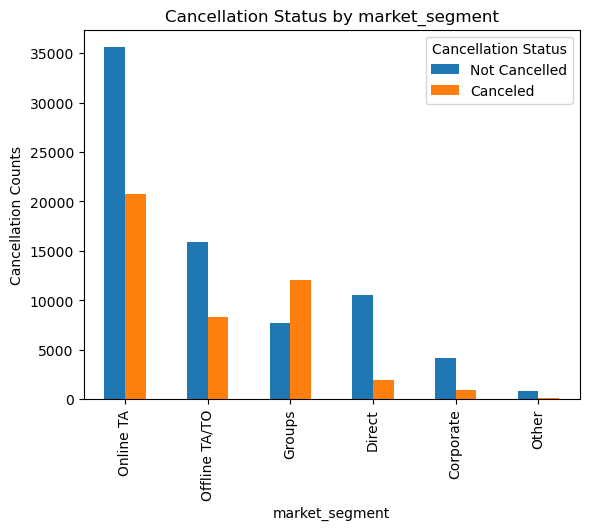

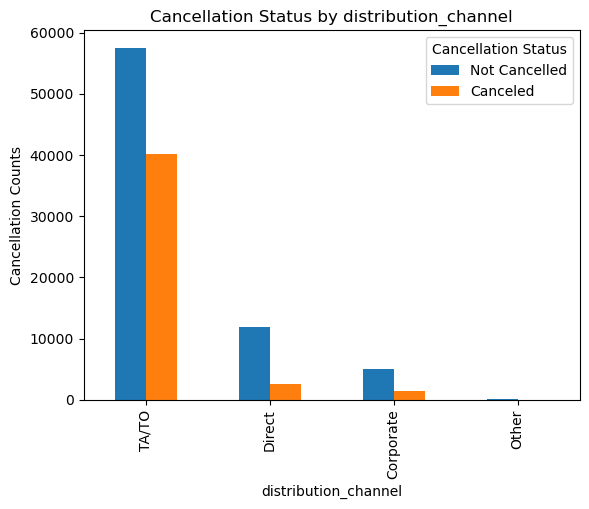

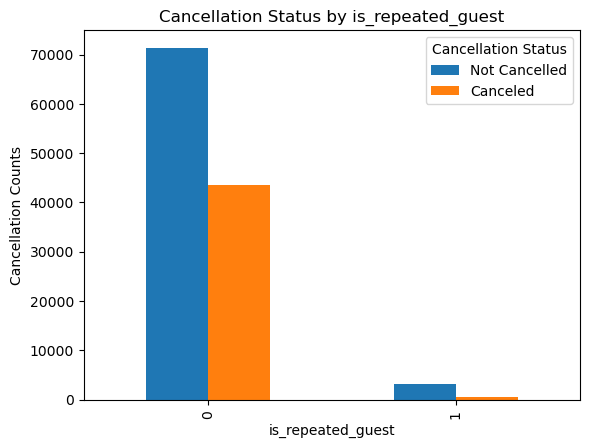

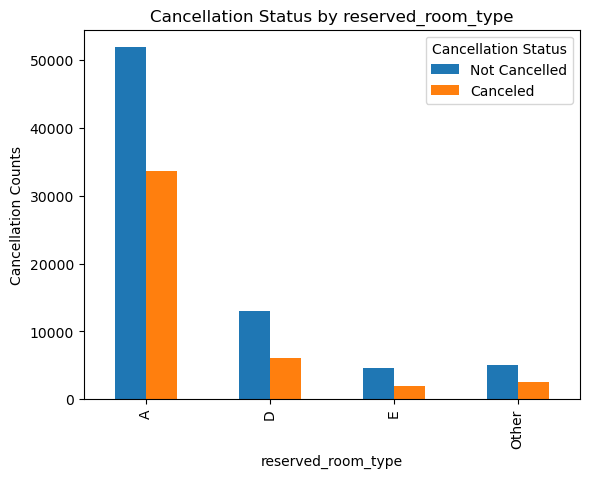

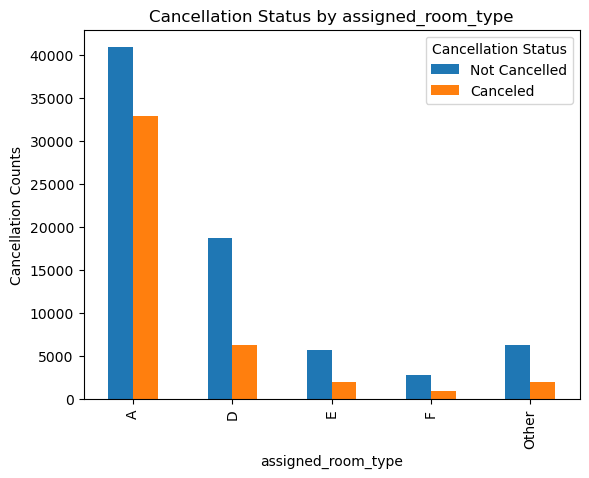

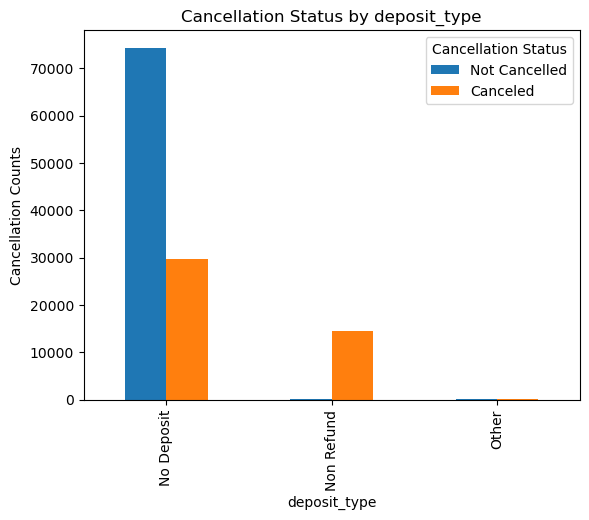

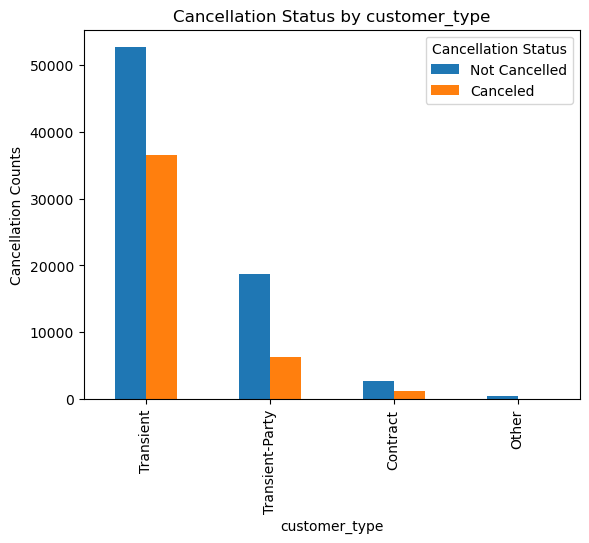

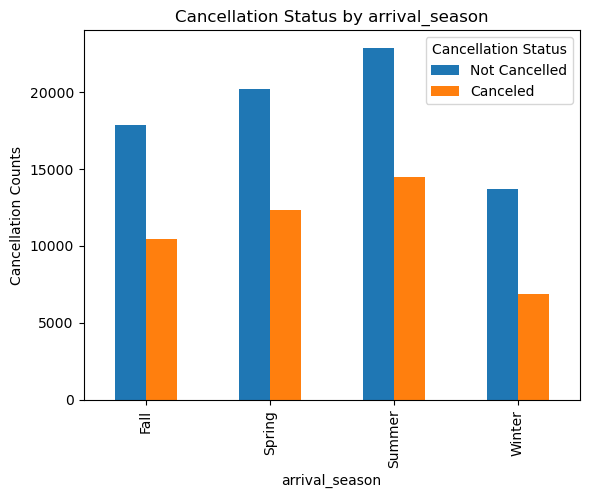

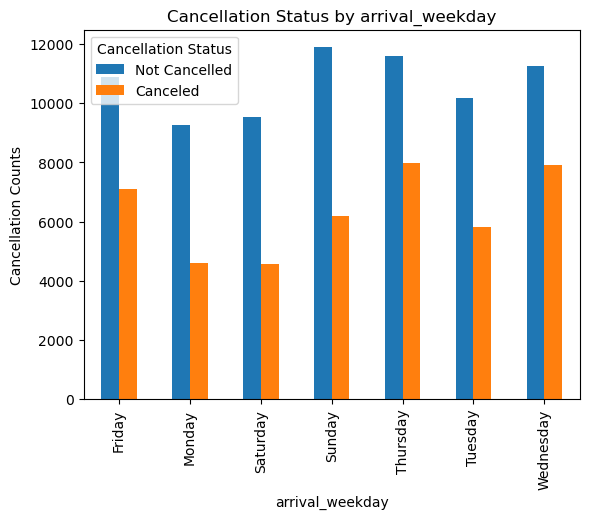

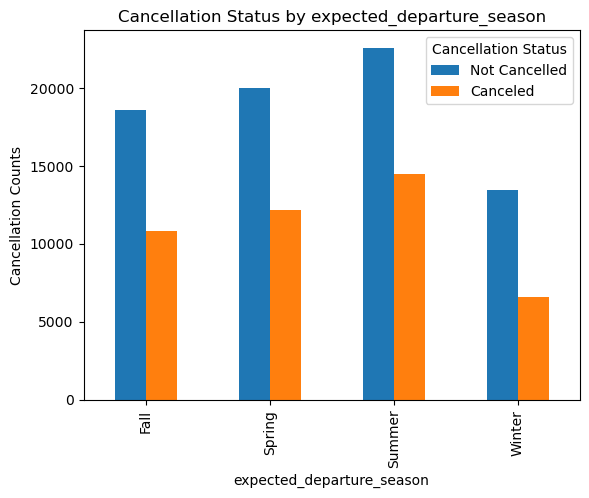

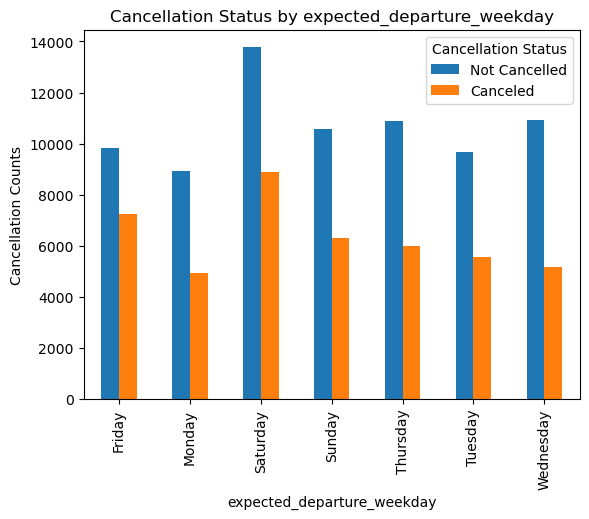

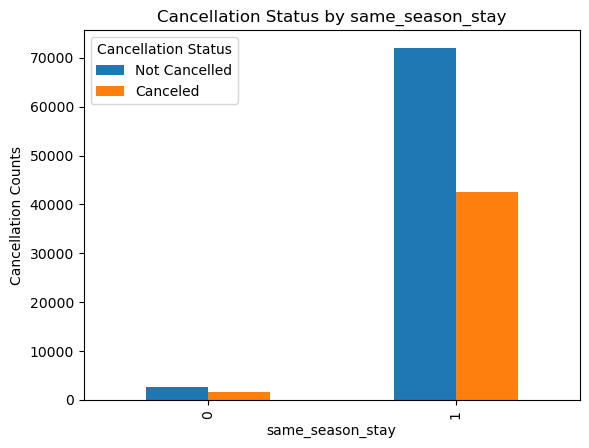

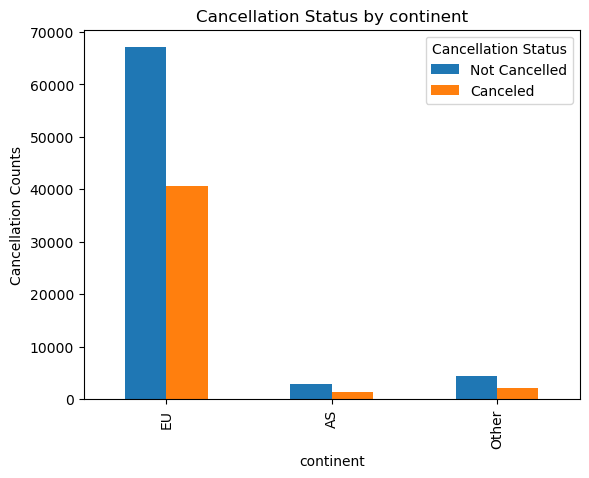

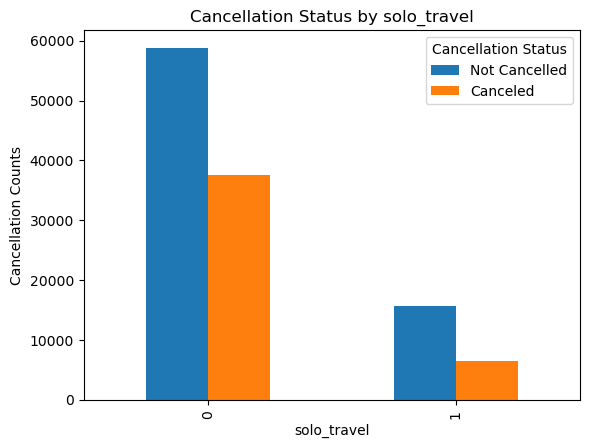

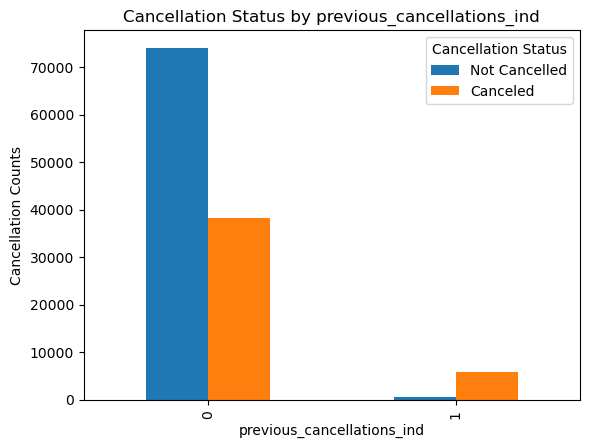

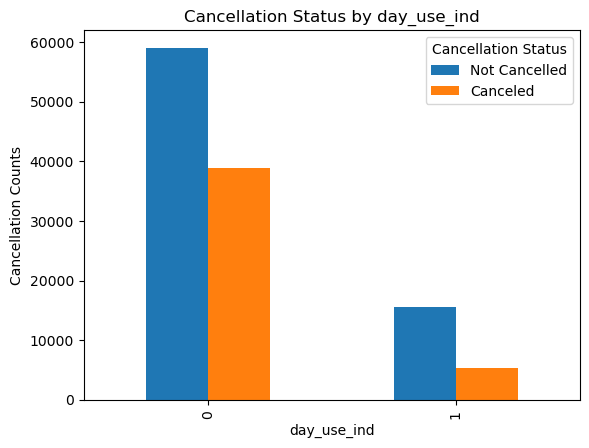

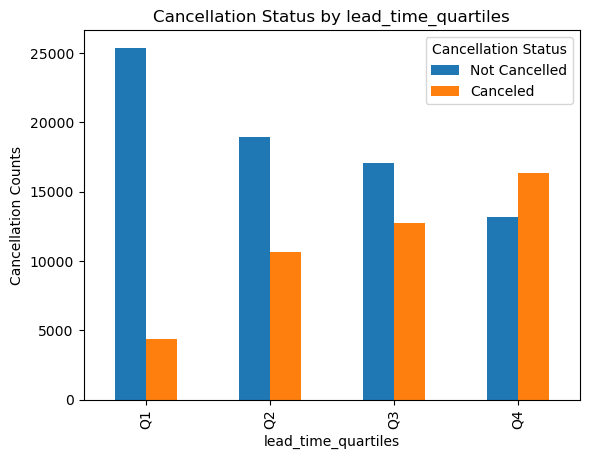

In [76]:
data=cat_combinelvls(data)
categorical_plots(data)

In [77]:
data.to_csv("CombinedCatsCleanedHotelBookings.csv", index=False)